#**Importing the data**

In [ ]:
# use these links to do so:
#Import the libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import figure
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN

In [ ]:
#Load the data set
from google.colab import files
uploaded=files.upload()

Saving Churn.csv to Churn (2).csv


In [ ]:
#Load the data into a data frame
df=pd.read_csv("Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#**Understanding the data**

In [ ]:
#Show the number of columns and rows
df.shape

(7043, 21)

In [ ]:
#Show all of the columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
#Check the missing/na values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Max tenure
df["tenure"].max()

72

In [ ]:
#Get customer churn count
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
ret=df[df.Churn=="No"].shape[0]
ch=df[df.Churn=="Yes"].shape[0]
#Percentage of customers that stayed
print("Percentage of the one that stayed ",ret/(ret+ch)*100)
#Percentage of customers that leave
print("Percentage of the one that left ",ret/(ret+ch)*100)

Percentage of the one that stayed  73.4630129206304
Percentage of the one that left  73.4630129206304


#**Data Manipulation**

In [ ]:
print("Previous shape ",df.shape)
df=df.drop("customerID",axis=1)
print("Updated shape",df.shape)

Previous shape  (7043, 21)
Updated shape (7043, 20)


In [ ]:
#Change data type of non-numeric columns to numeric
for c in df.columns:
  if df[c].dtype==np.number:
    continue
  df[c]=LabelEncoder().fit_transform(df[c])
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


#**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Plot')

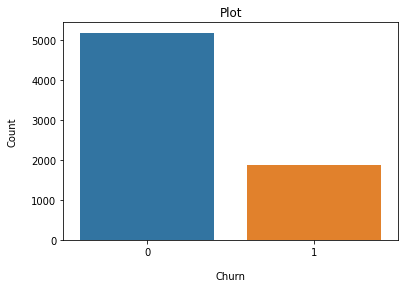

In [ ]:
#Visualize the count of customer churn
sns.countplot(df["Churn"])
plt.xlabel("Churn",labelpad=14)
plt.ylabel("Count",labelpad=14)
plt.title("Plot")

In [ ]:
#From above graph, we can see that there are more custumer that stay
#with the company than the one that left the company

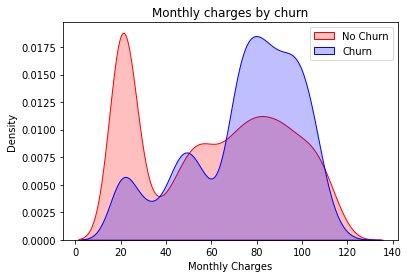

In [ ]:
p = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
p = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =p, color="Blue", shade= True)
p.legend(["No Churn","Churn"],loc='upper right')
p.set_ylabel('Density')
p.set_xlabel('Monthly Charges')
p.set_title('Monthly charges by churn')
plt.show()

In [ ]:
#From above graph, Churn is high whenever monthly charges are high

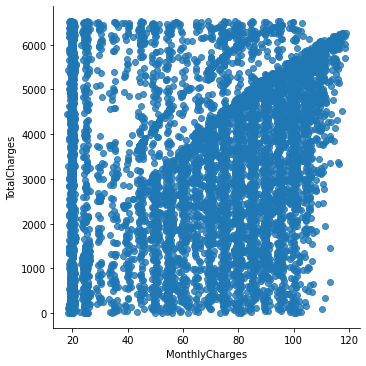

In [ ]:
sns.lmplot(data=df,x="MonthlyCharges",y="TotalCharges",fit_reg=False)

Text(0.5, 1.0, 'Plot')

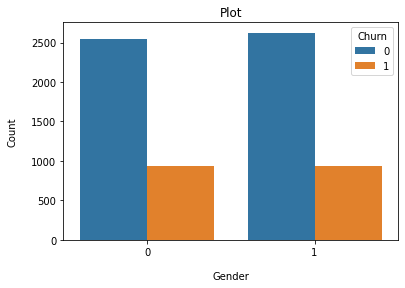

In [ ]:
#Visualize the churn count for both males and females
sns.countplot(x="gender",hue="Churn",data=df)
plt.xlabel("Gender",labelpad=14)
plt.ylabel("Count",labelpad=14)
plt.title("Plot")

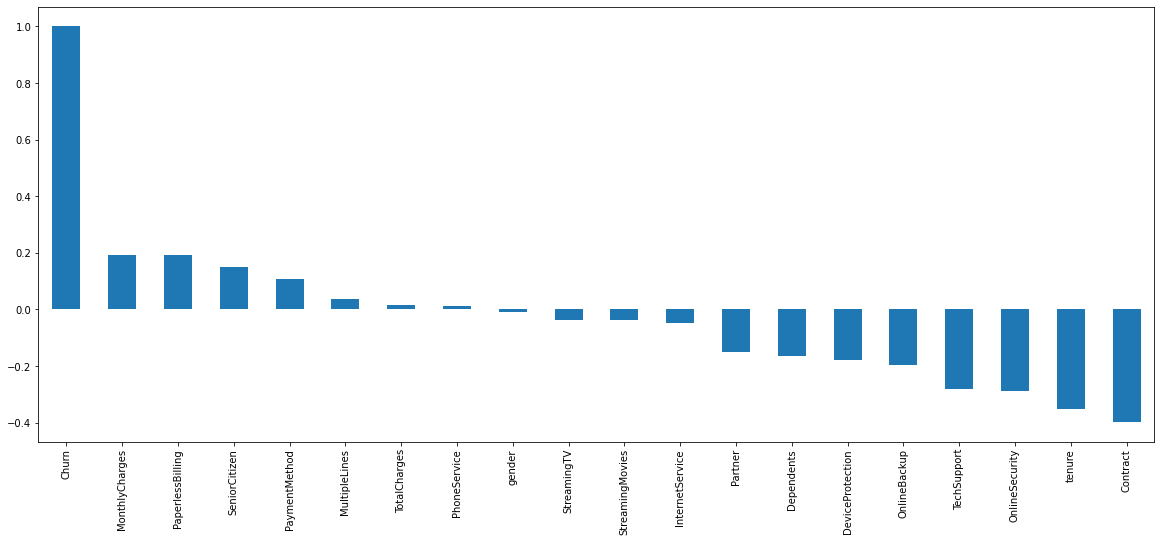

In [ ]:
plt.figure(figsize=(20,8))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

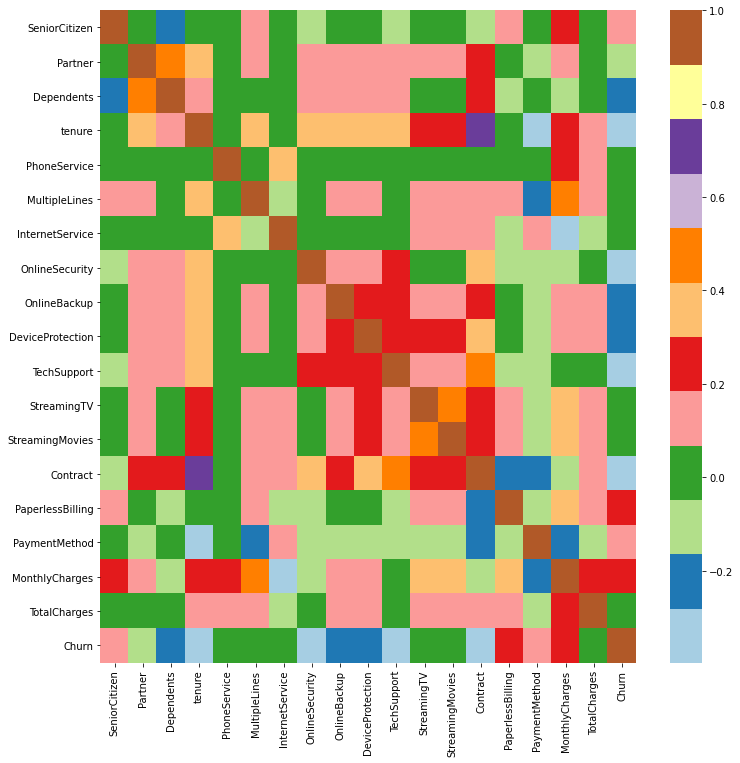

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.drop(["gender"],axis=1).corr(),cmap="Paired")

Text(0.5, 1.0, 'Plot')

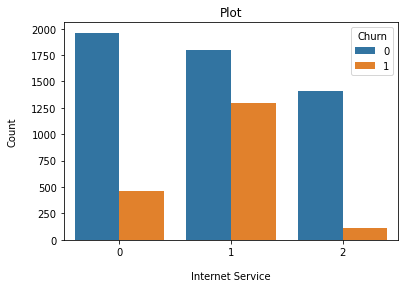

In [ ]:
#Visualize the churn count for internet service
sns.countplot(x="InternetService",hue="Churn",data=df)
plt.xlabel("Internet Service",labelpad=14)
plt.ylabel("Count",labelpad=14)
plt.title("Plot")

In [ ]:
#From this graph we can see that the highest number of customers that 
#did not churn have DSL internet service and the highest number of 
#customers that did churn have fiber optic internet services

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6db26b3d0>,
      dtype=object)

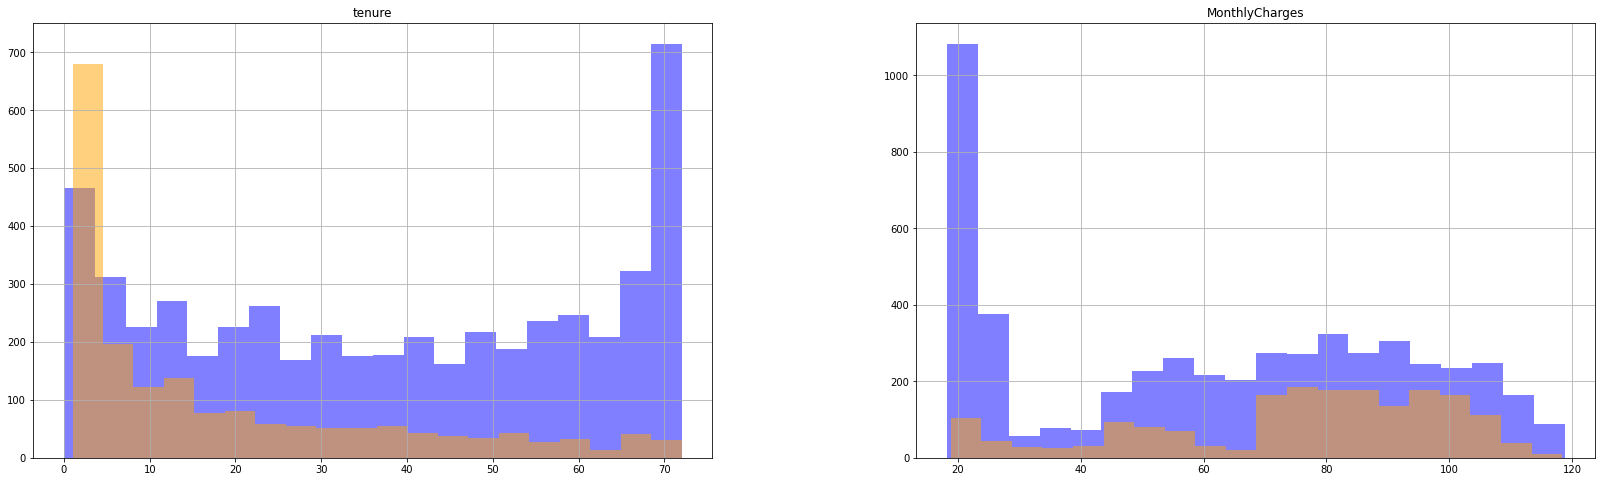

In [ ]:
feat=["tenure","MonthlyCharges"]
fig,ax=plt.subplots(1,2,figsize=(28,8))
df[df.Churn==0][feat].hist(bins=20,color="blue",alpha=0.5,ax=ax)
df[df.Churn==1][feat].hist(bins=20,color="orange",alpha=0.5,ax=ax)

In [ ]:
#Most of the customers that didnot churn have a monthly charge somewhere
#between 20$ and 30$. Churn count is higher between 70$ and 100$
#Most of the customers that churn have a tenure between 0 and 10 months
#and the one that didnot churn have high tenure

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#**Implementing Logistic Regression Classifier**

In [ ]:
#Scaling data and splitting it into 80% train and 20% test data set
X=df.drop("Churn",axis=1)
y=df["Churn"]
X=StandardScaler().fit_transform(X)
#3043/7043=0.432
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.432,random_state=42)

In [ ]:
#Create the model and train it
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predictions on test data
pred=model.predict(x_test)
pred

array([1, 0, 0, ..., 0, 0, 0])

###Model Evaluation

In [ ]:
#Find precision, recall and f1-score
cr_lr=classification_report(y_test,pred)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2234
           1       0.67      0.56      0.61       809

    accuracy                           0.81      3043
   macro avg       0.76      0.73      0.74      3043
weighted avg       0.80      0.81      0.81      3043



###Improving Model

In [ ]:
sm = SMOTEENN()
X_res0, y_res0 = sm.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
xs_train,xs_test,ys_train,ys_test=train_test_split(X_res0, y_res0,test_size=0.432)

In [ ]:
model=LogisticRegression()
model.fit(xs_train,ys_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
modelscore = model.score(xs_test, ys_test)
print(modelscore)

0.9189873417721519


#**Implementing Decision Tree Classifier**


In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred=model_dt.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

###Model Evaluation

In [ ]:
model_dt.score(x_test,y_test)

0.7873808741373645

In [ ]:
cr_dt=classification_report(y_test, y_pred, labels=[0,1])
print(cr_dt)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2234
           1       0.64      0.46      0.54       809

    accuracy                           0.79      3043
   macro avg       0.73      0.68      0.70      3043
weighted avg       0.77      0.79      0.78      3043



In [ ]:
#Accuracy is low as dataset is imbalanced so we should not use accuracy
#to measure the module. Thus we need to check precision, recall and 
#f1 score but they are also low.
#Thus we will call SMOTEENN
#Hence, we need to check recall, precision & f1 score for the minority 
#class, and it's quite evident that the precision, recall & f1 score is 
#too low for Class 1, i.e. churned customers.

###Improving model

In [ ]:
sm = SMOTEENN()
X_res, y_res = sm.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
xs_train,xs_test,ys_train,ys_test=train_test_split(X_res, y_res,test_size=0.432)

In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [ ]:
model_dt.fit(xs_train,ys_train)
ys_predict = model_dt.predict(xs_test)
modelscore = model_dt.score(xs_test, ys_test)
print(modelscore)
cr_dt=metrics.classification_report(ys_test, ys_predict)
print(cr_dt)

0.9244122965641953
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1194
           1       0.93      0.94      0.93      1571

    accuracy                           0.92      2765
   macro avg       0.92      0.92      0.92      2765
weighted avg       0.92      0.92      0.92      2765



In [ ]:
print(metrics.confusion_matrix(ys_test, ys_predict))

[[1097  131]
 [ 101 1434]]


In [ ]:
#Accuracy is good now i.e. 92 % and good recall, precision & f1 score are also good.

#**Implementing Random Forest Classifier**

In [ ]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

###Model Evaluation

In [ ]:
model_rf.score(x_test,y_test)

0.8057837660203746

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2234
           1       0.69      0.48      0.57       809

    accuracy                           0.81      3043
   macro avg       0.76      0.70      0.72      3043
weighted avg       0.79      0.81      0.79      3043



###Improving Model

In [ ]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
xs_train,xs_test,ys_train,ys_test=train_test_split(X_resampled1, y_resampled1,test_size=0.432)

In [ ]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf.fit(xs_train,ys_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
ys_predict1 = model_rf.predict(xs_test)

In [ ]:
modelscore = model_rf.score(xs_test, ys_test)

In [ ]:
print(modelscore)
cr_rf=classification_report(ys_test, ys_predict1)
print(cr_rf)

0.92875226039783
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1194
           1       0.93      0.95      0.94      1571

    accuracy                           0.93      2765
   macro avg       0.93      0.93      0.93      2765
weighted avg       0.93      0.93      0.93      2765



In [ ]:
print(metrics.confusion_matrix(ys_test, ys_predict1))

[[1115  113]
 [  88 1447]]


#**Final Conclusions**

In [ ]:
#From above 3 different Machine Learning models, i.e. , Logistic Regression, Decision Tree and Random Forest Classifier, 
#We get accuracy of around 80%. Afer improving them using SMOTEENN() we get accuracy around 92%. We saw relationship between 
#different features using statistics and plotting them on graph.